In [1]:
import os
import os.path as osp
from PIL import Image
import pandas as pd
from torch.utils.data.dataset import Dataset
import numpy as np
from sklearn.metrics import f1_score
import random

In [2]:
import matplotlib.pyplot as plt

def imshow_pair(im, gdt):
    f, ax = plt.subplots(1, 2, figsize=(12,6))
    np_im = np.asarray(im)
    np_gdt = np.asarray(gdt)
    if len(np_im.shape) == 2:
        ax[0].imshow(np_im, cmap='gray'),  ax[0].axis('off')
    else:
        ax[0].imshow(np_im),  ax[0].axis('off')
    if len(np_gdt.shape) == 2:
        ax[1].imshow(np.asarray(gdt), cmap = 'gray'), ax[1].axis('off')
    else:
        ax[1].imshow(np.asarray(gdt)), ax[1].axis('off')
    plt.tight_layout()

In [12]:
im1, im2 = Image.open('01_dr.tif').convert('L'), Image.open('12.png').convert('L')
mask1, mask2 = Image.open('01_dr_mask.tif').convert('L'), Image.open('12_mask.gif').convert('L')

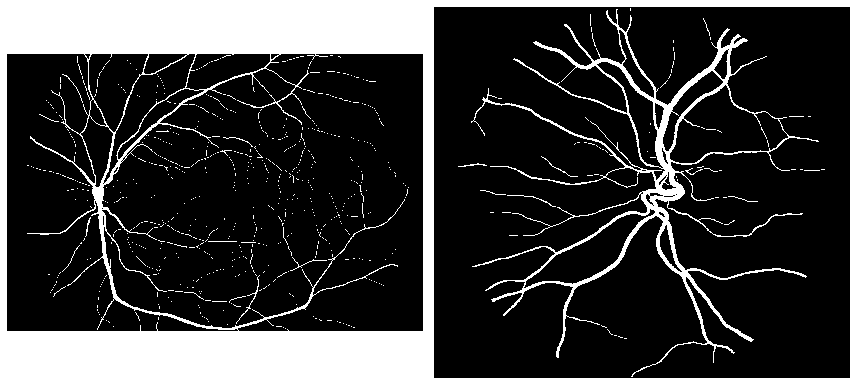

In [13]:
imshow_pair(im1, im2)

In [39]:
from skimage.measure import regionprops

import torch
from torchvision import transforms as tr

from models.get_reg_model import get_arch
from utils.model_saving_loading import load_model

In [40]:
def crop_to_fov(img, mask):
    mask = np.array(mask).astype(int)
    minr, minc, maxr, maxc = regionprops(mask)[0].bbox
    im_crop = Image.fromarray(np.array(img)[minr:maxr, minc:maxc])
    return im_crop

In [41]:
def prepare_single_image(im, mask):
    rsz = tr.Resize([512, 512])
    tnsr = tr.ToTensor()
    transf = tr.Compose([rsz, tnsr])
    
    im_crop = crop_to_fov(im, mask)
    return transf(im_crop).unsqueeze(0)

In [72]:
model = get_arch('resnet18')
load_checkpoint = 'experiments/best_mse/'

In [63]:
model, _ = load_model(model, load_checkpoint, device='cpu', with_opt=False)

In [64]:
im_prep = prepare_single_image(im1, mask1)
torch.sigmoid(model(im_prep)).item()

0.8490069508552551

In [65]:
im_prep = prepare_single_image(im2, mask2)
torch.sigmoid(model(im_prep)).item()

0.9111355543136597

In [66]:
im1 = Image.open('data/DRIVE/predicted_epoch_20/21_manual1.gif').convert('L')
im2 = Image.open('data/DRIVE/predicted_epoch_60/21_manual1.gif').convert('L')

mask = Image.open('data/DRIVE/mask/01_mask.gif')

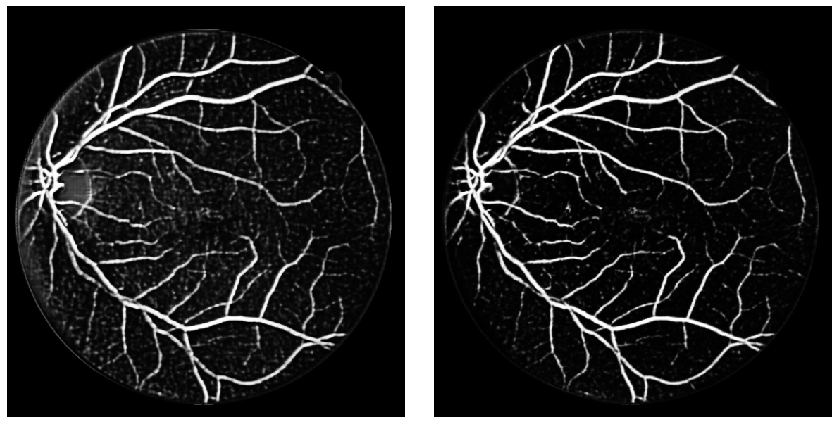

In [67]:
imshow_pair(im1, im2)

In [68]:
im1_bin = np.array(im1)>100
im2_bin = np.array(im2)>100

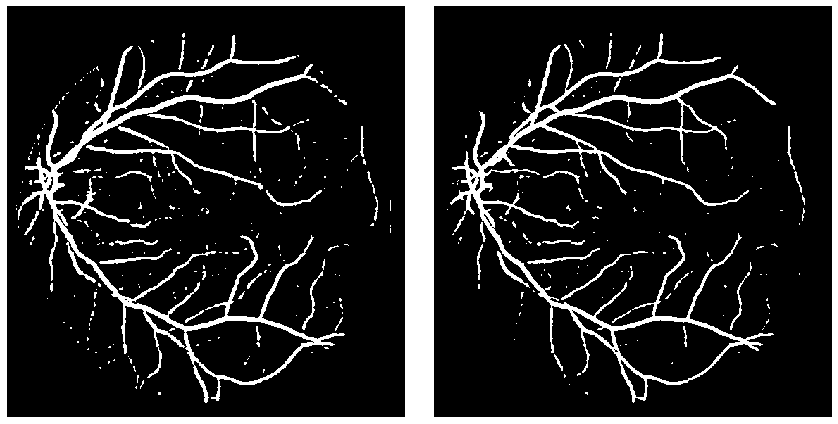

In [69]:
imshow_pair(im1_bin, im2_bin)

In [70]:
im_prep = prepare_single_image(im1_bin, mask)
torch.sigmoid(model(im_prep)).item()

0.6986160278320312

In [71]:
im_prep = prepare_single_image(im2_bin, mask)
torch.sigmoid(model(im_prep)).item()

0.6850475668907166